![logo.jpg](logo.jpg) 
### Report photométrique de l'étoile variable ***V1490 Cyg***<br>

###### Dominique Touzan.
###### 1. https://sites.google.com/view/astronomie-ut1/accueil
###### 2. dtouzan@gmail.com
###### 3. Jupyter Notebook : https://github.com/dtouzan/v1490Cyg/blob/master/v1490cyg.ipynb

###### **Édition**   1.0, révision 23/10/2019

##### **Résumé** : Visualisation et report photométrique de l'étoile variable v1490 Cyg durant la période d'octobre 2019. Quinze mesures avec un filtre CLS CCD en début de soirée avec des jours de pleine lune ou de lune gibeuse et un temps relativement calme. Les valeurs reportées sont bien évidemment représentatifs du filtre utilisé. 

###### ***Mots-clés*** : Etoile variable - Photométrie - Astropy - Jupyter
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)

#### I. Positions des prises de vue de l'observatoire UT1 sur une projection Aitoff.
##### Les marqueurs indiquent les positions des différentes images prise à l'observatoire. Un fichier au format MAST **(mast.stsci.edu)** est lu et mis en forme pour reporter les observations indiquées en bleu, un autre fichier lui reporte différentes constellations ainsi que la LMC et SMC.

In [3]:
# Date    :04/09/2019
# Autheur :Dominique Touzan, dtouzan@gmail.com
# Importation des modules
#           numpy       : Informatique scientifique 
#           matplotlib  : Mathématique,dessin
#           datetime    : Temps
#           astropy     : Astronomie
#           aplpy       : Astronomie
#           astroplan   : Astronomie
#
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.table as vstack
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
from astropy.utils import iers
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import aplpy
#import astroplan
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration pour le cache IERS
iers.conf.auto_download = False 

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

In [4]:
# Importation des fichiers de données
#           UT1_MAST_CATALOG       : Catalogue UT1 Mast
#           data_milky_way         : Catalogue d'étoiles
#           data_SMCLMC            : Catalogue SMC LMC
#           data_AAVSO             : Mesures AAVSO
data = ascii.read("UT1_MAST_CATALOG.csv",data_start=3,format='csv')
data_milky_way = ascii.read("data_Milky_Way.csv",data_start=1,format='csv')
data_SMCLMC = ascii.read("data_SMCLMC.csv",data_start=1,format='csv')
data_v1490cyg_UT1 = ascii.read("v1490cyg_UT1.csv",data_start=1,format='csv')
data_AAVSO = ascii.read("v1490cyg_AAVSO.csv",data_start=1,format='csv')

# Longitude et latitude de UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

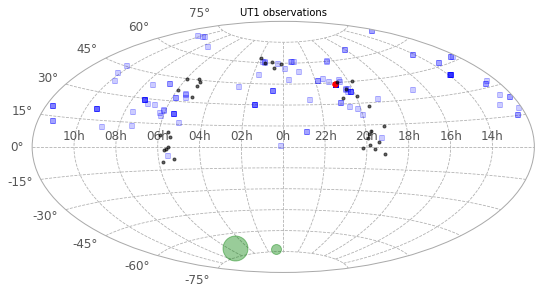

In [6]:
# Objet rechrercher dans le catalogue UT1 Mast
data_search='v1490cyg'

# Configuration du dessin
fig = plt.figure(figsize=(9,5))
# Configuration de la projecion cartographique du titre et grille 
ax = fig.add_subplot(111,projection='aitoff')
plt.grid(True,axis='both',linestyle='--')
plt.title('UT1 observations', fontsize=10)


# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]==data_search:
        marker_color='red'
        marker_alpha=0.8
        marker_label=''
        marker_type='o'
    else:
        marker_color='blue'
        marker_type='s'
        marker_alpha=0.2
        marker_label=''
    # RA et DEC en degré    
    ra=ligne[10]*u.deg
    dec=ligne[11]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
    # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Dessin des constellations
for ligne in data_milky_way:
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, 'o', color='black', markersize=3, alpha=0.6)

# Dessin des SMC LMC
for ligne in data_SMCLMC:
    name=ligne[2]
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    if name == "smc":
        marker_size=10
    else:
        marker_size=25
    plt.plot(ra_rad, dec_rad, 'o', color='green', markersize=marker_size, alpha=0.4)
    
# Modification des labels en heure
ax.set_xticklabels(['10h','08h','06h','04h','02h','0h','22h','20h','18h','16h','14h'])
# Affichage
plt.show()

###### ***Fig. 1.*** La marque rouge indique la position de l'étoile variable 

#### II. Hauteurs de l'étoile variable à l'observatoire UT1
##### La hauteur de v1490 Cyg vers 0h UT est proche du zénith, la constellation du cygne est bien accéssible pour le site cependant certaines soirées sont délicates car le temps ne se prête guère à l'observation et la Lune ne permet pas de bonnes prise de vue quand celle ci est illuminée au dessus de 50%.

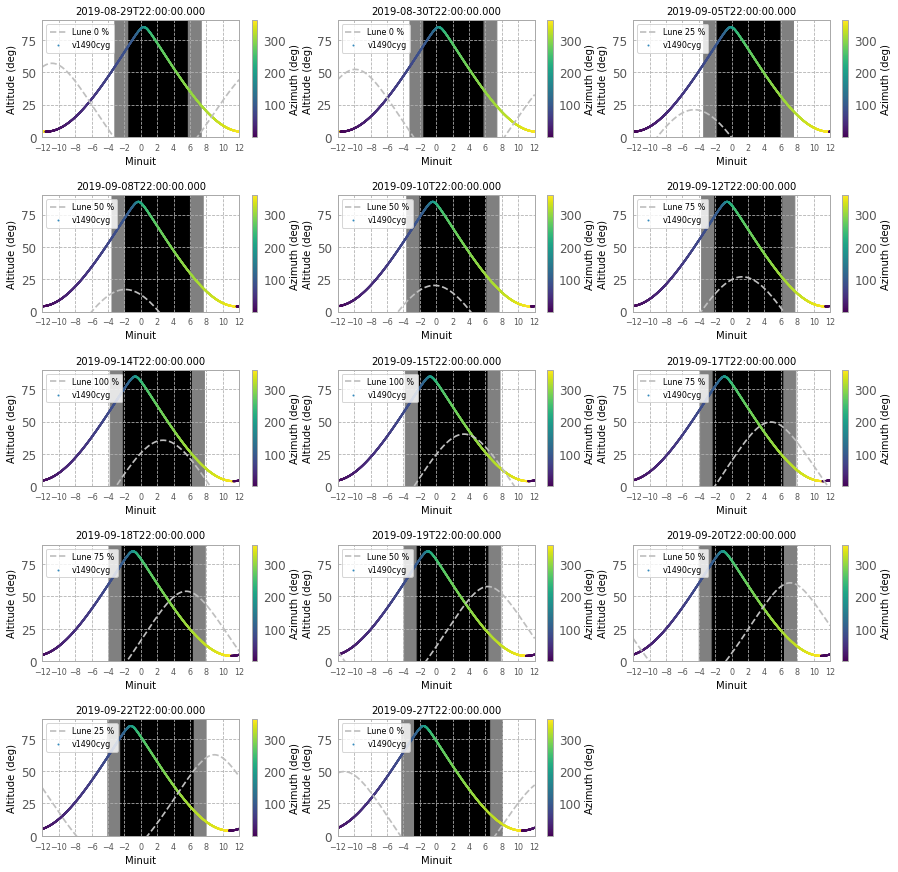

In [7]:
# Affichage des hauteurs
#       Example gallery            : astropy
# Ajout de l'illumination de la Lune 
# Nom de l'astre rechercher au CDS
name_astre='v1490cyg'

# Dates de l'observation
dates_obs = ['2019-08-30T00:00:00','2019-08-31T00:00:00','2019-09-06T00:00:00','2019-09-09T00:00:00',
             '2019-09-11T00:00:00','2019-09-13T00:00:00','2019-09-15T00:00:00','2019-09-16T00:00:00',
             '2019-09-18T00:00:00','2019-09-19T00:00:00','2019-09-20T00:00:00','2019-09-21T00:00:00',
             '2019-09-23T00:00:00','2019-09-28T00:00:00']
# soirées de l'observation à minnuit
dates_midnight = ['2019-08-30T00:00:00','2019-08-31T00:00:00','2019-09-06T00:00:00','2019-09-09T00:00:00',
                  '2019-09-11T00:00:00','2019-09-13T00:00:00','2019-09-15T00:00:00','2019-09-16T00:00:00',
                  '2019-09-18T00:00:00','2019-09-19T00:00:00','2019-09-20T00:00:00','2019-09-21T00:00:00',
                  '2019-09-23T00:00:00','2019-09-28T00:00:00']
# % illumination de la Lune
moon_phase = [0,0,25,50,50,75,100,100,75,75,50,50,25,0]

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# taille du canevas
plt.figure(figsize=(15,15))

index = 0
for date in dates_obs:
    # initialisation de la date d'observation
    # module astropy
    date_observation = Time(date, format='isot', scale='utc') - utcoffset
    midnight = Time(dates_midnight[index], format='isot', scale='utc') - utcoffset
    # Azimuth et hauteur de l'astre
    # module astropy
    astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))
    # Azimuth et hauteur du Soleil
    # module astropy
    delta_midnight = np.linspace(-12, 12, 2000)*u.hour
    times_dates = midnight + delta_midnight
    frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
    sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)
    # Azimuth, hauteur
    # module astropy
    # Illumination de la Lune module astroplan
    moon_dates = get_moon(times_dates)
    moonaltazs_dates = moon_dates.transform_to(frame_dates)
    #k=int(astroplan.moon_illumination(date_observation)*100)
    k=moon_phase[index]
    # Azimuth et hauteur de l'astre
    # module astropy
    astrealtazs_dates = astre_altaz.transform_to(frame_dates)
    #
    # Dessin 
    #
    plt.subplot(5, 3, index+1)
    plt.grid(True,axis='both',linestyle='--')
    # Tracé de la Lune, couleur et label avec % d'illumination
    plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
    # Tracé de l'astre, label et couleur
    plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
    # tracé de la nuit (pénombre)
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
    # Tracé de la nuit total
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)
    # Trace du titre
    plt.title(str(date_observation), fontsize=10)
    # Tracé du label "Azimuh"
    plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
    # tracé des légendes
    plt.legend(loc='upper left', fontsize=8)
    # Tracé de la grille Horaire
    plt.xlim(-12, 12)
    plt.xticks(np.arange(13)*2 -12, fontsize=8)
    # Tracé de la grille d'altitude
    plt.ylim(0, 90)
    # Tracé du label "Minuit" sur axe X
    plt.xlabel('Minuit', fontsize=10)
    # Tracé du label "Altitude"
    plt.ylabel('Altitude (deg)', fontsize=10)
    index = index+1

# Affichage
plt.show()

###### ***Fig. 2.*** Hauteur de v1490 Cyg et illumination et hauteur de la Lune pour les quatorze soirées.

#### III. Repérage de l'étoile variable dans la nébuleuse IC 5070 (Nébuleuse du Pélican).
##### Pour indiquer le repérage les images des soirées ont d'abord été calibrées avec le logiciel **Iris** puis additionées, pour la première image une addition de vingt images de 180 secondes du 22 octobre 2019 et pour la deuxième une addition de soixante-neuf images de 180 secondes des soirées du 29 et 30 septembre 2019, puis avec le logiciel **Aladin Sky Atlas** une calibration astrométrique est appliquée pour indiquer les coordonées **WCS**. 

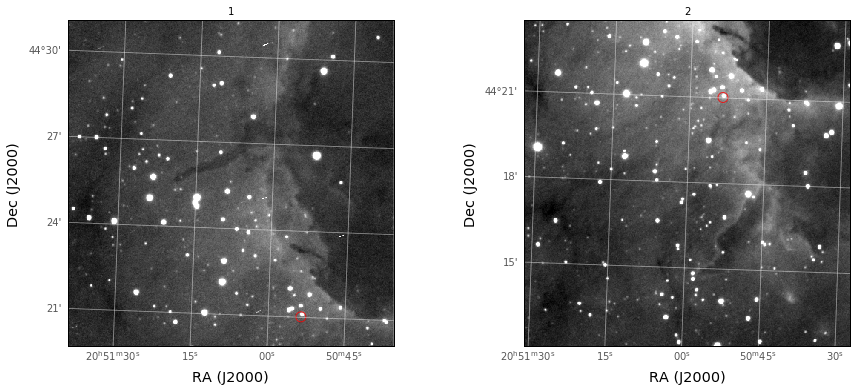

In [5]:
# Coordonées Aladin Sky Atlas
# Intitulée v1490 cyg
coord_astre = SkyCoord.from_name('v1490cyg')
v_ra = coord_astre.ra*u.deg
v_dec = coord_astre.dec*u.deg

data_image = [['v1490cyg-20190922.fits',200,450,'1'],['v1490cyg-20190829.fits',15000,25000,'2']]

# Affichage des images de référence
# Marquage de la variable
fig = plt.figure(figsize=(15,15))
index = 0
for line in data_image:
    f1=aplpy.FITSFigure(data_image[index][0],figure=fig, subplot=(2,2,index+1))
    f1.add_grid()
    f1.tick_labels.set_font(size='small')
    f1.show_markers(v_ra, v_dec, edgecolor='red', facecolor='none', marker='o', s=100, alpha=0.8)
    f1.show_grayscale(vmin=data_image[index][1], vmax=data_image[index][2])
    plt.title(data_image[index][3],fontsize=10)
    index = index + 1

fig.canvas.draw()

###### ***Fig. 3.*** Image des soirées du 22/09/2019 à 20h17mn (1) et du 29/09/2019 et 30/09/2019 (2).

#### IV. Report des mesures avec les données de l'AAVSO.
##### Pour ces quinze mesures l'étoile de référence était UCAC4 672-086818 et une deuxième étoile UCAC4 672-086809 a été prise pour améliorer la précision des mesures. Peu de mesure pour cette étoile dans le catalogue de l'AAVSO a cette période. Une courbe se dessine relativement bien pour les dates du 12 au 27 octobre avec un minimum le 10 octobre 2019, tout ceci avec un filtre CLS CCD qui n'est pas le plus adapté pour ce type d'observation car une des valeurs de l'AAVSO est plus basse de 0.15 par rapport aux mesures du 22 octobre 2019 .

MJD		 Mv	 Band
V* 1490 Cyg	 -----	 ------

58724.84861	 15.84	 CLS
58725.85972	 15.83	 CLS
58731.83333	 15.42	 CLS
58734.825	 15.45	 CLS
58736.83055	 15.85	 CLS
58738.82847	 15.32	 CLS
58740.8111	 15.22	 CLS
58741.80763	 15.19	 CLS
58743.80972	 15.17	 CLS
58744.80972	 15.17	 CLS
58745.80694	 15.19	 CLS
58746.80625	 15.19	 CLS
58748.80001	 15.33	 CLS
58748.80416	 15.3	 CLS
58753.79791	 15.57	 CLS



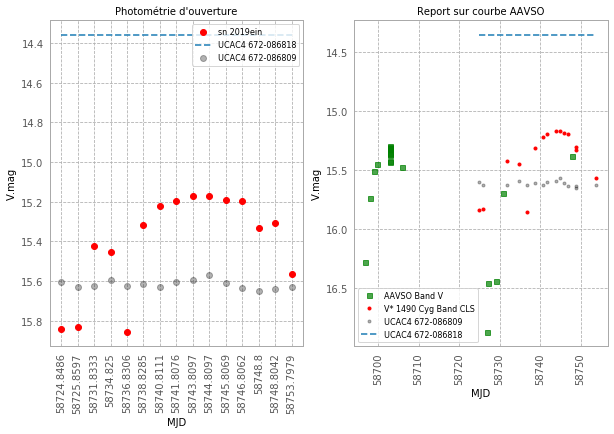

In [14]:
# Calcul de la magnitude
# Affichage des magnitudes calculées
Vmag = []
Cmag = []
C2mag = []
mjd = []
print('MJD\t\t Mv\t Band')
print('V* 1490 Cyg\t -----\t ------')
print()


for line in data_v1490cyg_UT1:
    name_constante = line[7]
    band = line[4]
    Vadu = float(line[24])
    Cadu = float(line[25])
    C2adu = float(line[26])
    Cmag_UCAC4 = float(line[14])
    Cmag.append(Cmag_UCAC4)
    t=Time(float(line[0]),format='jd')
    mjd.append(round(t.mjd,4))
    #
    # mag1 - mag2 = -2,5 log10 (flux1 / flux2) 
    #
    Vmag_calc = -2.5*(np.log10(Vadu/Cadu))+Cmag_UCAC4
    C2mag_calc = -2.5*(np.log10(C2adu/Cadu))+Cmag_UCAC4
    Vmag.append(Vmag_calc)
    C2mag.append(C2mag_calc)
    print(str(round(t.mjd,8))+'\t',str(round(Vmag_calc,2))+'\t',band)

print()

# Graph des mesures
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(np.arange(len(data_v1490cyg_UT1)),Vmag,'o', color='red', label='sn 2019ein')
plt.plot(np.arange(len(data_v1490cyg_UT1)),Cmag, '--', label=name_constante)
plt.plot(np.arange(len(data_v1490cyg_UT1)),C2mag, 'o', color='black', alpha=0.3, label='UCAC4 672-086809')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('MJD',fontsize=10)
plt.ylabel('V.mag',fontsize=10)
plt.title("Photométrie d'ouverture",fontsize=10)
plt.xticks(np.arange(len(data_v1490cyg_UT1)),mjd,rotation=90)

# Graph de la courbe AAVSO
name_AAVSO='AAVSO'
name_UT1='V* 1490 Cyg'
band='V'
band_UT1='CLS'

# Table AAVSO
x_AAVSO=[]
y_AAVSO=[]

for line in data_AAVSO:
    if line[4] == band:
        t=Time(float(line[0]),format='jd')
        x_AAVSO.append(round(t.mjd,4))
        y_AAVSO.append(float(line[1]))

# Graph de la courbe AAVSO et report des mesures
plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(x_AAVSO,y_AAVSO,'s', color='green',markersize=5, alpha=0.7,label=name_AAVSO+" Band "+band )
plt.plot(mjd,Vmag,'o', color='red',markersize=3, alpha=1,label=name_UT1+" Band "+band_UT1)
plt.plot(mjd,C2mag,'o', color='black',markersize=3, alpha=0.3,label='UCAC4 672-086809')
plt.plot(mjd,Cmag, ls='--', label=name_constante)
plt.xlabel('MJD',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('V.mag',fontsize=10)
plt.legend(loc='lower left', fontsize=8)
plt.title("Report sur courbe AAVSO",fontsize=10)
plt.show()

###### ***Fig. 4.*** Graphique des magnitudes enregistrées.

#### V. Différence de magnitude de v1490 Cyg
##### Quatre des images les plus représentatives de la magnitude élévée sont les 8, 9, 10 et 11. Chaque image est une médiane de onze images (l'étoile est au centre en bas de l'image). Le temps de pose est de 180 secondes
###### 08. 15/09/2019 à 19h23mn, 09. 17/09/2019 à 19h26mn, 10. 18/08/2019 à 19h38mn, 11. 19/09/2019 à 19h22mn

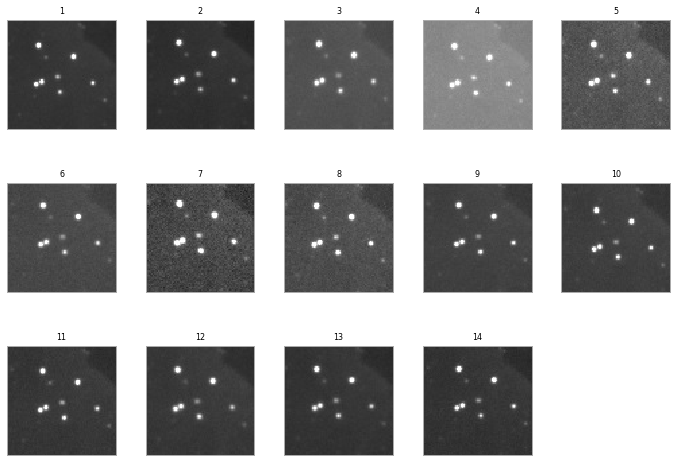

In [17]:
fig = plt.figure(figsize=(12,8))

# Nom des images jpeg
images = ['20190829','20190830','20190905','20190908','20190910','20190912','20190914',
          '20190915','20190917','20190918','20190919','20190920','20190922','20190927']

index = 0
for image in images:
    plt.subplot(3, 5, index+1)
    # Lecture de l'image
    im = mpimg.imread( image+'.jpg')
    # Suppresion des grilles
    plt.xticks([], [])
    plt.yticks([], [])
    # Titres 1, 2 ...
    plt.title(index+1,fontsize=8)
    # insertion des images dans le canvas
    plt.imshow(im)
    index = index + 1
# Affichage
fig.canvas.draw()

###### ***Fig. 5.*** Images des différentes magnitudes.